In [ ]:
# Performed in line with Edureka's learning content
!wget https://www.dropbox.com/s/w3zlhing4dkgeyb/train.zip?dl=0
!unzip train.zip?dl=0

--2021-09-24 12:11:09--  https://www.dropbox.com/s/w3zlhing4dkgeyb/train.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/w3zlhing4dkgeyb/train.zip [following]
--2021-09-24 12:11:10--  https://www.dropbox.com/s/raw/w3zlhing4dkgeyb/train.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc7b2bfff758f283e8073b962de6.dl.dropboxusercontent.com/cd/0/inline/BWz14LQsAW-UsnpYENmGDaIrJkweDfbLFGYA0_UcK5RVhEfY3QseAl3lCJELlog0D5dr_ofPNfT7PSQUsCpG_LBukJun-cgScoY8Z6bz4lJmw34uTpjGltTVCSYyy2AGDveYSWz9bxhzHJ59KKoR0RSu/file# [following]
--2021-09-24 12:11:10--  https://uc7b2bfff758f283e8073b962de6.dl.dropboxusercontent.com/cd/0/inline/BWz14LQsAW-UsnpYENmGDaIrJkweDfbLFGYA0_UcK5RVhEfY3QseAl3lCJELlog0D5dr_ofPNfT7PSQUsCpG_LBukJu

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.applications.mobilenet import MobileNet,preprocess_input
from keras.models import Model
from keras.layers import Flatten,Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array,load_img

In [ ]:
base_model=MobileNet(input_shape=(224,224,3),include_top=False)
for layer in base_model.layers:
  layer.trainable=False
x=Flatten()(base_model.output)
x=Dense(units=7,activation='softmax')(x)
model=Model(base_model.input,x)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0   

In [ ]:
model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy'])

In [ ]:
train_datagen=ImageDataGenerator(zoom_range=0.2,shear_range=0.2,horizontal_flip=True,rescale=1/255)
train_data=train_datagen.flow_from_directory(directory="/content/train",target_size=(224,224),batch_size=32)

Found 350 images belonging to 7 classes.


In [ ]:
train_data.class_indices

{'Angry': 0,
 'Disguist': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

In [ ]:
val_datagen=ImageDataGenerator(rescale=1/255)

In [ ]:
val_data=val_datagen.flow_from_directory(directory="/content/train",target_size=(224,224),batch_size=32)

Found 350 images belonging to 7 classes.


In [ ]:
t_img,label=train_data.next()

In [ ]:
def PlotImages(img_arr,label):
  count=0
  for im,l in zip(img_arr,label):
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis=False
    plt.show()
    count+=1
    if count==10:
      break

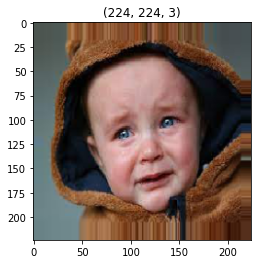

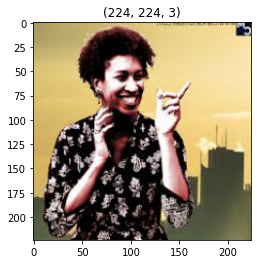

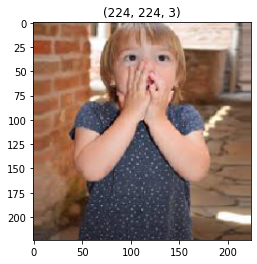

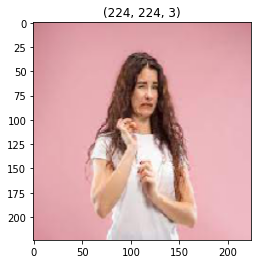

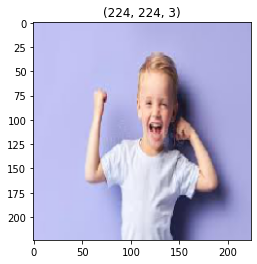

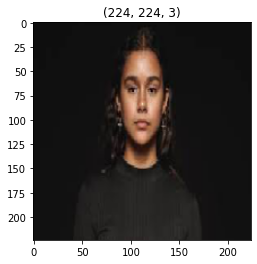

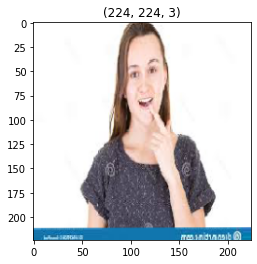

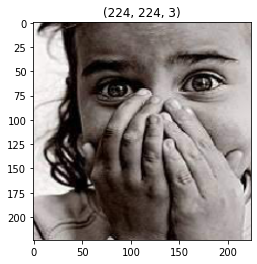

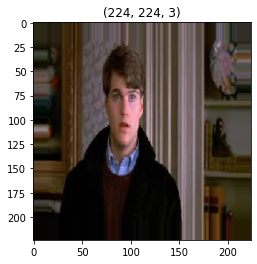

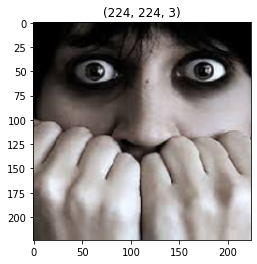

In [ ]:
PlotImages(t_img,label)

In [ ]:
from keras.callbacks import ModelCheckpoint,EarlyStopping
es=EarlyStopping(monitor='val_accuracy',min_delta=0.01,patience=5,verbose=1,mode='auto')
mc=ModelCheckpoint(filepath="best_model.h5",monitor='val_accuracy',verbose=1,save_best_only=True,mode='auto')
call_back=[es,mc]

In [ ]:
hist=model.fit_generator(train_data,steps_per_epoch=10,epochs=30,validation_data=val_data,validation_steps=8,callbacks=[es,mc])

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
10/10 [==============================] - 25s 2s/step - loss: 10.4204 - accuracy: 0.1918 - val_loss: 6.1137 - val_accuracy: 0.4609

Epoch 00001: val_accuracy improved from -inf to 0.46094, saving model to best_model.h5
Epoch 2/30
10/10 [==============================] - 22s 2s/step - loss: 4.4331 - accuracy: 0.5157 - val_loss: 2.3804 - val_accuracy: 0.6289

Epoch 00002: val_accuracy improved from 0.46094 to 0.62891, saving model to best_model.h5
Epoch 3/30
10/10 [==============================] - 22s 2s/step - loss: 1.5994 - accuracy: 0.7264 - val_loss: 0.6769 - val_accuracy: 0.8438

Epoch 00003: val_accuracy improved from 0.62891 to 0.84375, saving model to best_model.h5
Epoch 4/30
10/10 [==============================] - 22s 2s/step - loss: 0.8588 - accuracy: 0.8113 - val_loss: 0.1970 - val_accuracy: 0.9531

Epoch 00004: val_accuracy improved from 0.84375 to 0.95312, saving model to best_model.h5
Epoch 5/30
10/10 [==============================] - 22s 2s/step - loss: 0.5596

In [ ]:
h=hist.history

In [ ]:
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

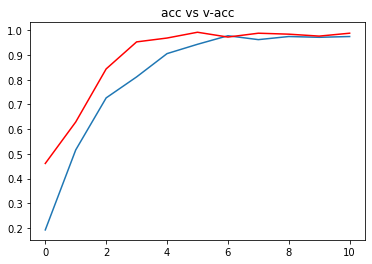

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'],c="red")
plt.title("acc vs v-acc")
plt.show()

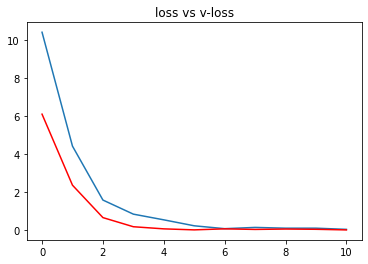

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'],c="red")
plt.title("loss vs v-loss")
plt.show()

In [ ]:
op=dict(zip(train_data.class_indices.values(),train_data.class_indices.keys()))

The image is of Fear


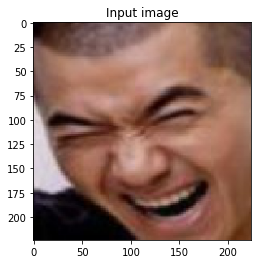

In [ ]:
path='/content/sample_data/emotiontest.jpg'
img=load_img(path,target_size=(224,224))
i=img_to_array(img)/255
input_arr=np.array([i])
input_arr.shape
pred=np.argmax(model.predict(input_arr))
print(f"The image is of {op[pred]}")
plt.imshow(input_arr[0])
plt.title("Input image")
plt.show()
